In [234]:
# Importing packages

#Importing modules we will use
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import xgboost as xgb





# To Show plots in notebook
%matplotlib inline 

# Using machine learning for regression 

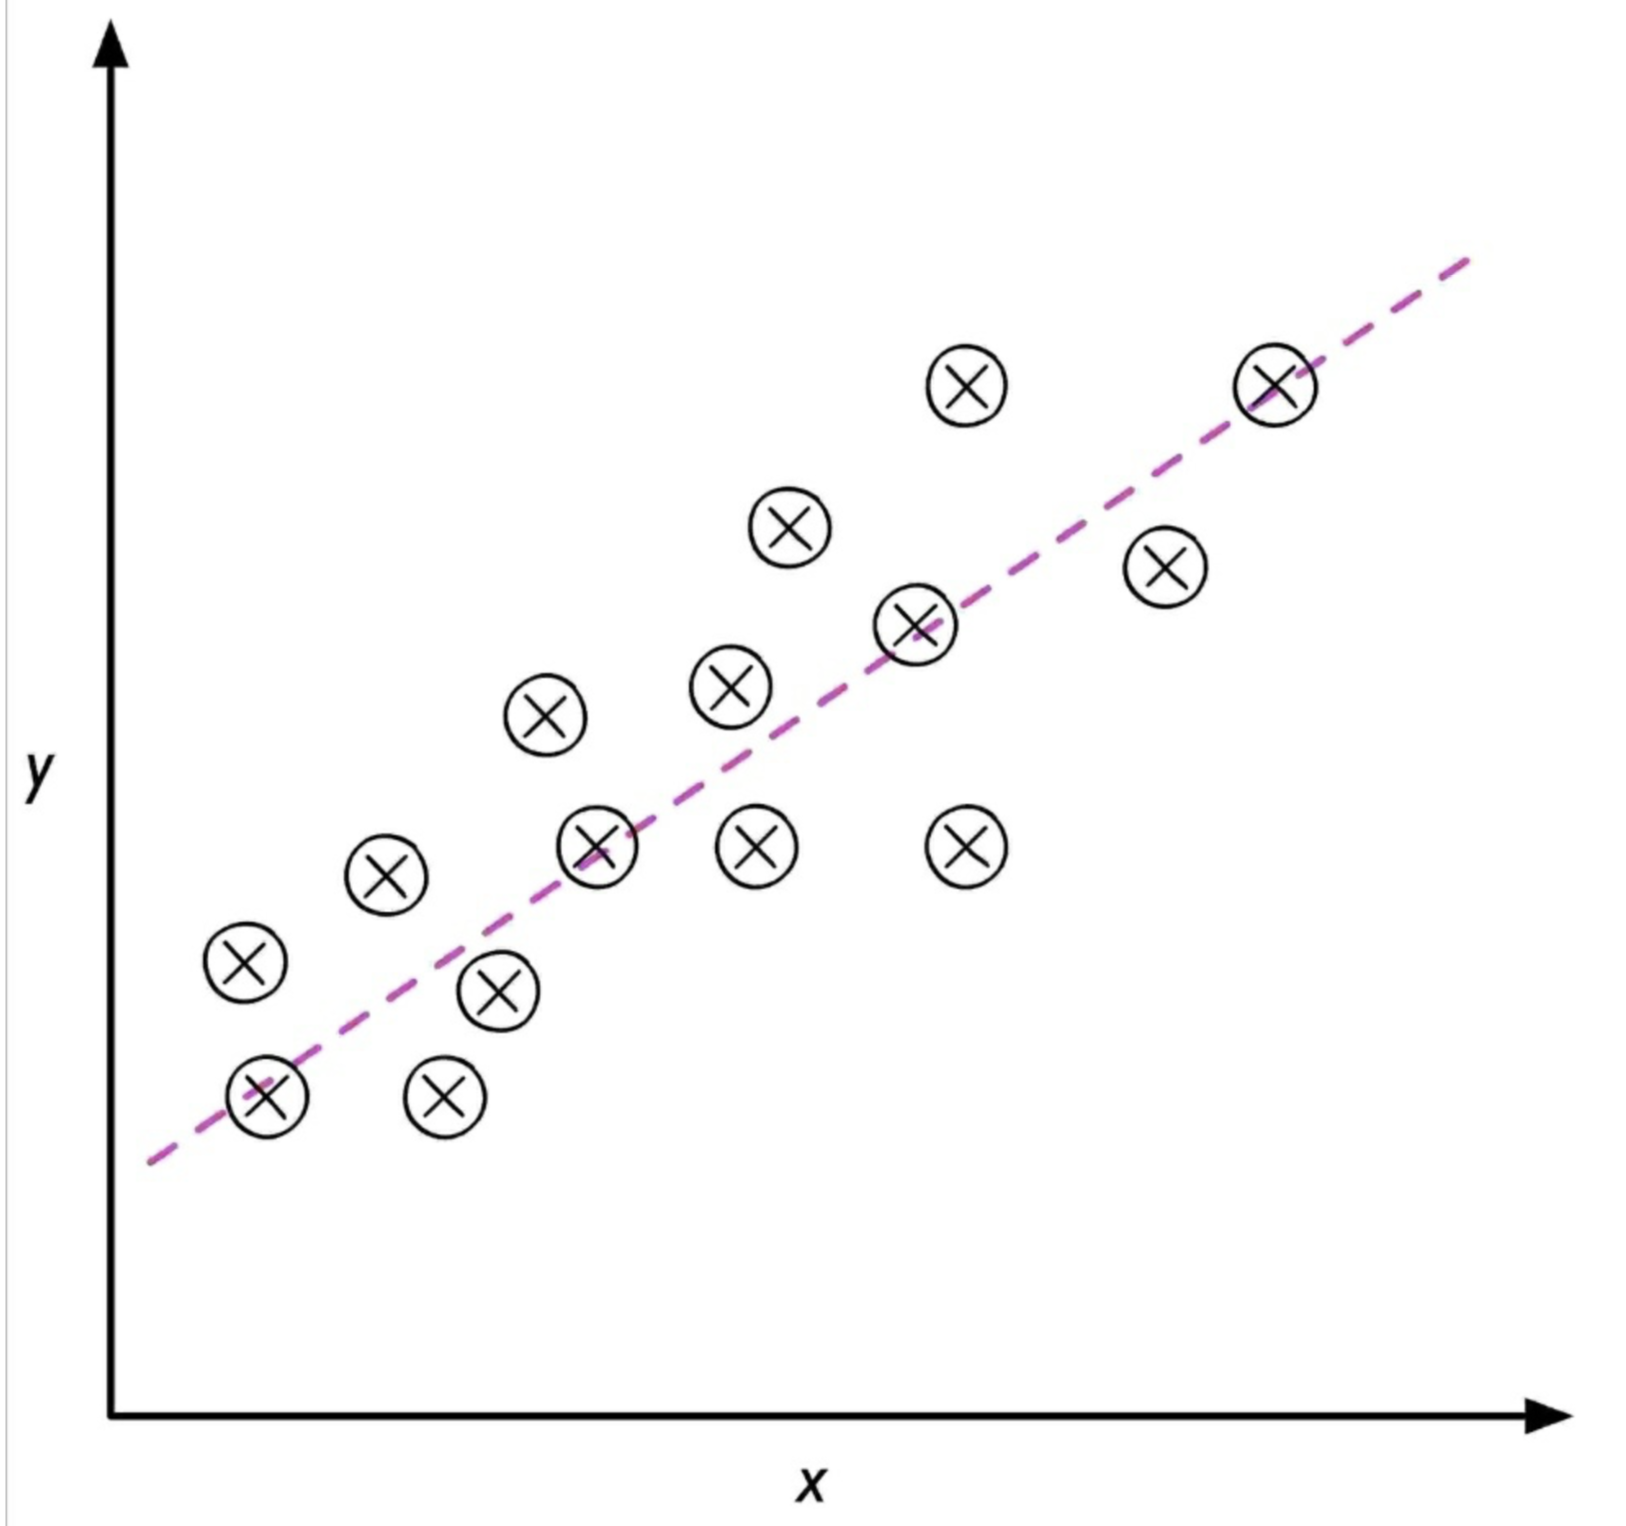

In [236]:
Image(filename='figs/Regression.png', width=400)
# The figure below is taken from Python Machine Learning book by Sebastian Raschka

# The steps in almost every supervised learning project:

- ### Get Data 
(features (inputs) and output)
- ### Preprocessing the data 
(test train split, normalization, feature extraction, data imputation and etc.) 
- ### Assuming Structural form
for mapping inputs to outputs (e.g., linear regression,  Neural Network architecture). 
- ### Minimize a loss function (cost, objective)
by changing the structure or weights (parameters, coefficients) of the specific structural form

# Getting the data set

## In this data set we will try to predict (using regression) the quality of wines. 

In [237]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data = pd.read_csv(dataset_url, sep=';')
print('The data set size is:',data.shape)

The data set size is: (4898, 12)


### Understanding what the data looks like


In [239]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


- ### The output we predict is an ordinal variable 
(strickly speaking an ordinal variable  is categorical where the variable has natural ordered categories). In the prediction of this lesson we will treat it as a contious varibale though there are differnet techniques to do perform ordinal prediction. 

In [240]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Dividing data to train and  test datasets

In [241]:
y = data.quality #This is the output that we want to predict. 
X = data.drop('quality', axis=1) #Dropping the output column from our features
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)
 


# Training a Random Forest on the data

In [242]:
RF_reg=RandomForestRegressor(n_estimators=10, random_state=1)
RF_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

### We trained a Random Forest! 

In [243]:
pred = RF_reg.predict(X_test)
print('The R^2 (coefficient of determination) on the test set is:',r2_score(y_test, pred))
# print('The MSE (coefficient of determination) on the test set is:', mean_squared_error(y_test, pred))
pred_train = RF_reg.predict(X_train)
print('The R^2 (coefficient of determination) on the train set is:',r2_score(y_train, pred_train))



The R^2 (coefficient of determination) on the test set is: 0.5244675827674024
The R^2 (coefficient of determination) on the train set is: 0.9068881937598589


- ### RF is highly overfitted! 
(Check if it is overfitting or that the test set is different from the train set - oob_score)


- ### Need to undersand how to improve its predictions by changing hyperparameters

### The coefficient of determination is:
### $R^2 = 1 -\frac{\sum_i (y_i-\hat{y}_i)^2}{\sum_i (y_i-\overline{y}_i)^2}$

#### where $\hat{y}_i$ is the predicted output and $\overline{y}_i$ is the mean output (target)

### In this session you need to improve the prediction of the RF. 

You need to search for optimal hyperparameters that give an optimal prediction (our matrix of success will be the MSE). 

## Random Forest Visualization for regression 

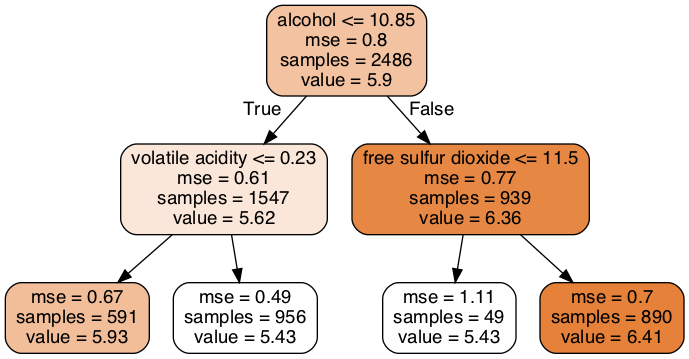

In [212]:
Image(filename='figs/tree_MSE.png', width=700)
# If you want to produce the tree image yourself - run the commented cell bellow

In [213]:
# #You might not be able to run the following code without additional packages (not necessary for class)
# RF_small = RandomForestRegressor(max_depth=2,random_state=10)
# RF_small.fit(X_train,y_train)
# # RF_small.fit(cancer_data.data,cancer_data.target)
# estimatorRF = RF_small.estimators_[1]
# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(estimatorRF, out_file='tree_MSE.dot', 
#                 feature_names =  np.array(X_train.columns),
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)
# # from subprocess import call
# # call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# from subprocess import check_call
# check_call(['dot','-Tpng','tree_MSE.dot','-o','tree_MSE.png'])

# from IPython.display import Image
# Image(filename = 'tree_MSE.png')




## Classification And Regression Tree (CART)
- Greedy algorithm (search for optimal split)  - Risk of overfitting (low bias, high variance trade-off )

## The basic algorithm:
- ### Start with all training data the root node
- ### Use Mean Squared Error (MSE) to choose which feature to split  (at each node). 
MSE - for regression problems, information gain -  in classification task
### $MSELoss = \frac{\sum_i (Y_i - \hat{Y}_i)^2}{n}$
- ### Stop growing the tree when the leaf is pure (values of all samples are the same), or alternatively when got to some pruning cretrion


-- Random Forest (see more detailse [here](https://www.kdnuggets.com/2017/10/random-forests-explained.html)) - use an ensamble method to reduce overfitting - combine many "weak" learners to create a strong algorithm 
- Average out the outcome of individual trees, thus lowering the overfitting

- ### Where randomization comes from:
 - #### Every tree gets a different data set (usually bootstraping) - most people refer to it as bootstrap aggregation (Bagging).
 - #### There is a random selection of split variables.  Instead of searching greedily for the best predictors to create branches, it randomly samples elements of the predictor space. This process is also known as “feature bagging”.
 
#### RFs have a general tendency to overfit (so we commonly need to use regularization somehow). 
 



### "Regularization" in Random Forest

- ### Depth of the tree
 reducing the depth (pruning). Can be by hard constaint to the tree depth or by some creterion determining when to stop growing a tree (e.g., max_depth, min_samples_split, min_impurity_decrease in RandomForestClassifier)
- ### Number of features 
Reduce the number of features to consider when looking for the best split (max_features in RandomForestClassifier)
- ### subsampling 
Each tree will train on less data

The main hyperparameters we should tune are:
the number of trees in the forest, its maximal depth (in the plotted tree it is 4), The number of features to consider when looking for the best split (max_features) and the minimum number of samples required to be at a leaf node (min_samples_leaf).





## Visualization RandomForest regression output

In [244]:
def lin(a, b, x): return a*x + b

create some data points x and y which lie on the line

In [245]:
a = 2
b = 4
n = 100
x1 = np.random.rand(n)
y1 = lin(a, b, x1) + np.random.rand(n)

Text(0, 0.5, 'Y (Output)')

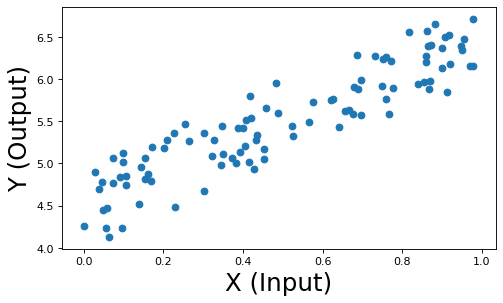

In [246]:
fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x1, y1);
plt.xlabel('X (Input)', fontsize=22)
plt.ylabel('Y (Output)', fontsize=22)

In [261]:
linearRF = RandomForestRegressor(n_estimators=1,max_depth=1,random_state=1) # Try do change the number of trees and their depth and see how the prediction of RF changes. 
x1 = x1.reshape(-1, 1)
linearRF.fit(x1.reshape(-1, 1),y1)
pred_lin = linearRF.predict(x1)

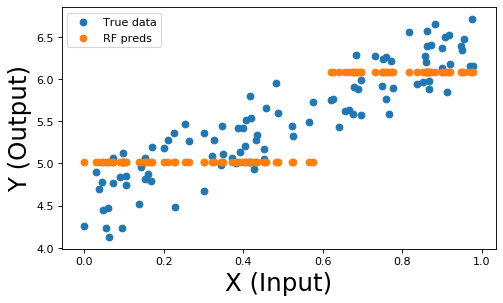

In [262]:
fig=plt.figure(figsize=(7,4), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x1, y1,label='True data');
plt.scatter(x1, pred_lin,label='RF preds');
plt.legend(loc="upper left");
plt.xlabel('X (Input)', fontsize=22);
plt.ylabel('Y (Output)', fontsize=22);


# Hyperparameter tunning and k-fold Cross Validation (CV)

#### Every Machine Learning model has some parameters that we can tune.
For example: 
- #### loss function
- #### Regularization form
- #### Structure of model 
(e.g., in neural networks the number layers and many other parameters that we will discuss later in the course)
- #### Learning rate for gradient decent (discussed later in the course)

Usually, it is difficult to know the hyperparameter values that will give the 'best' performance. Therefore, we need to experimentally search for such combination of parameters. If we try many (say 100) hyperparameter combination that will be all tested on the test data set, there is a risk that we will get a very good performance on the test set  by chance  (especially if it is a small dataset!). 
Therefore, when we are tuning hyperparameters, we divide again the training data - to a new training dataset (smaller than the previous one) and a CV dataset (which is a new test set). 

Comment: Creating a reliable CV might be a very challenging task in certain datasets (think in which situations choosing samples at random will not be a representing CV dataset)

### K-fold cross-validation


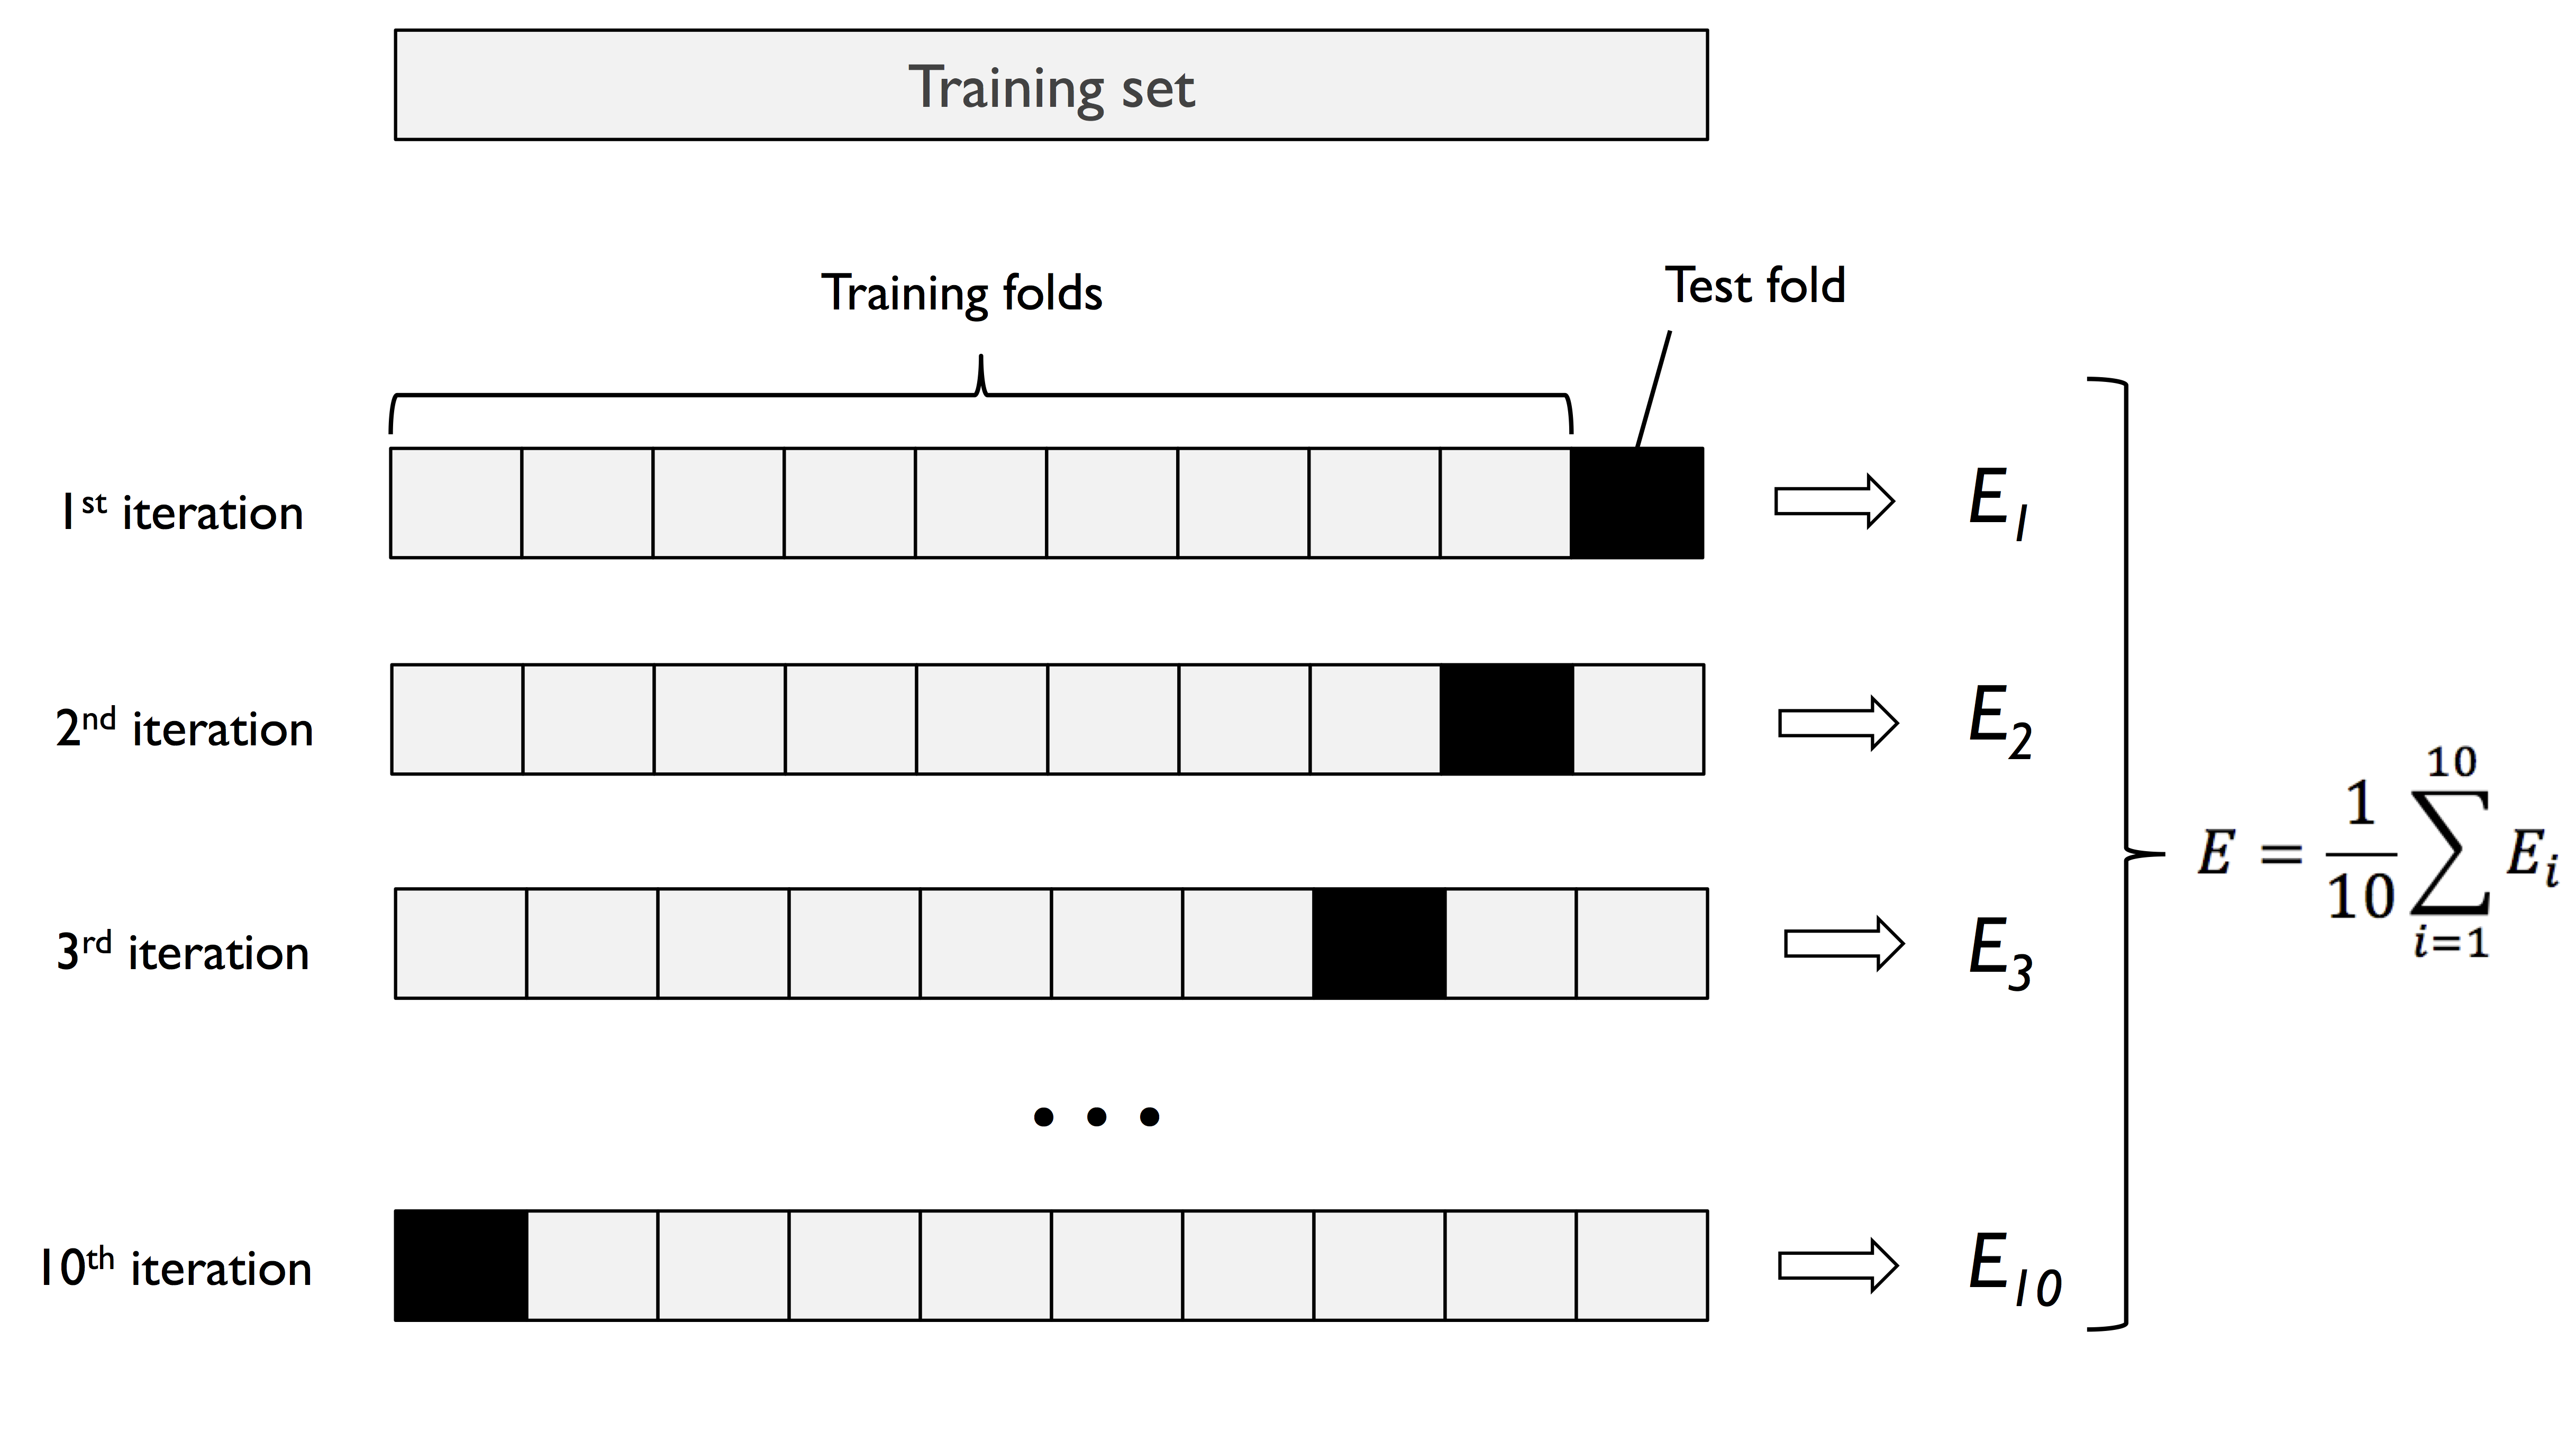

In [219]:
# Image from Sebastian's Raschka book
Image(filename='figs/k_cross_validation.png', width=700)


### Example: tuning a random forest (need to use cross validation). 

In [263]:
hypertune = RandomForestRegressor(random_state=1)
hypertune.get_params().keys()


dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [264]:
max_depth_list = [5,None] # For simplicity I am using shallow tree
max_features_list = [0.4,0.7]
Tree_num_list = [10,20]
param_grid = [{'max_depth': max_depth_list, 
               'n_estimators': Tree_num_list,
              'max_features': max_features_list}]

gs = GridSearchCV(estimator=hypertune, 
                  param_grid=param_grid, 
                  cv=5,
                  scoring='r2',
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.46878023984068384
{'max_depth': None, 'max_features': 0.7, 'n_estimators': 20}


In [265]:
# #Printing results for all RFs that we fitted. Helps to understand where should we look for the best parameters. 
# for i in range(gs.cv_results_['std_test_score'].shape[0]):
#     print('For RF with features:', gs.cv_results_['params'][i])
#     print('The mean test accuracy is:', gs.cv_results_['mean_test_score'][i], '+/-', gs.cv_results_['std_test_score'][i])    

For RF with features: {'max_depth': 5, 'max_features': 0.4, 'n_estimators': 10}
The mean test accuracy is: 0.3125388169674246 +/- 0.013041809870443536
For RF with features: {'max_depth': 5, 'max_features': 0.4, 'n_estimators': 20}
The mean test accuracy is: 0.32140112814648 +/- 0.013616230598584422
For RF with features: {'max_depth': 5, 'max_features': 0.7, 'n_estimators': 10}
The mean test accuracy is: 0.3207470054177439 +/- 0.018715964607996665
For RF with features: {'max_depth': 5, 'max_features': 0.7, 'n_estimators': 20}
The mean test accuracy is: 0.32751581149833137 +/- 0.016590603472000247
For RF with features: {'max_depth': None, 'max_features': 0.4, 'n_estimators': 10}
The mean test accuracy is: 0.4268923851161467 +/- 0.014780076162731508
For RF with features: {'max_depth': None, 'max_features': 0.4, 'n_estimators': 20}
The mean test accuracy is: 0.46672467163234455 +/- 0.01874015325123035
For RF with features: {'max_depth': None, 'max_features': 0.7, 'n_estimators': 10}
The me

## After finding the best configuration for RF, train the RF on the whole data again!

## Feature importance

### Interpreting results
In many cases we would like to interpret our results. Feature importance is the fastest thing that can be checked, but thre are many great methods to interpret tree based algorithms. See [here](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3) how feature importance is calculated. For more details about feature importance see [here](https://towardsdatascience.com/interpreting-random-forest-and-other-black-box-models-like-xgboost-80f9cc4a3c38)

- check that the importance make sense 
- raise issues/correct bugs: Make sure there is no target leakage (e.g., using a feature that was not suppose to be used and helps the prediction) 

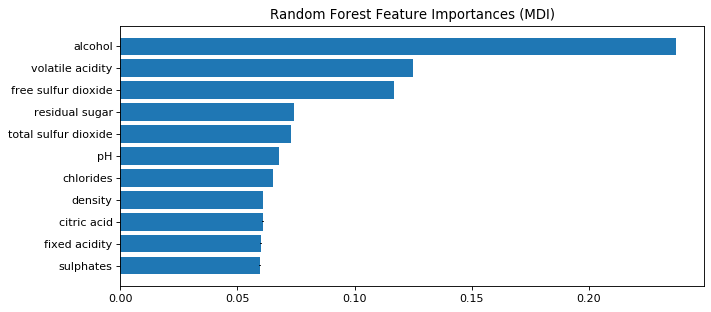

In [266]:
names = X_train.columns
sorted_idx =  RF_reg.feature_importances_.argsort()
std = np.std([tree.feature_importances_ for tree in RF_reg.estimators_],axis=0)

y_ticks = np.arange(0, len(names))

fig, ax = plt.subplots(figsize=(9,4), dpi= 80)
ax.barh(y_ticks,  RF_reg.feature_importances_[sorted_idx],yerr = std[sorted_idx])
ax.set_yticklabels(names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

## Subsampling

- #### Subsampling can be used both for training faster on our dataset (when experimenting differnet model parameters) and regularization.

- #### The basic idea is that we can give each tree only a subset of the data. Given that we train enough trees, we will still use all availble data overall

In [267]:
from sklearn.ensemble import forest

def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))


In [269]:
set_rf_samples(2000)
RF_subsample = RandomForestRegressor(n_estimators=300,max_features =0.8,n_jobs=-1)
%time RF_subsample.fit(X_train, y_train)
print('The R^2 (coefficient of determination) on the test set is:',r2_score(y_test, RF_subsample.predict(X_test)))
reset_rf_samples()

CPU times: user 2.74 s, sys: 121 ms, total: 2.86 s
Wall time: 708 ms
The R^2 (coefficient of determination) on the test set is: 0.556031827426429


# Linear regression

### It is useful always to look on a simple regression (or logistic regression in classification problems) in order to understand if some fancy ML algorith is really doing better than a simple model. 




- ### In Linear regression we assume that 

- ### $y = w_0 + \sum_i w_i x_i $ 

and we look for the $w$ coefficients that give the 'best' prediction for the output ($y$). The best prediction is defined by minimizing some cost function. For linear regression in machine learning task it is usually the mean square error.  Namely, the loss in linear regression is usually:

- ### $MSE = \frac{\sum_i (Y_i - \hat{Y}_i)^2}{n} =\frac{\sum_i (Y_i - \sum_j X_{ij} w_j)^2}{n}$

where $n$ is the number of samples, $Y_i$ are the true values and $X_{ij}$ is expressing the ith sample with feature j (where bias term is not written explicitly). 

In [270]:
# Ridge regression is when we are adding to the Loss function a regularization term, and our new cost function is:

# - ### $MSELoss+Ridge = \frac{\sum_i (Y_i - \sum_j X_{ij} w_j)^2}{n}+ \lambda \sum_i w_i^2$

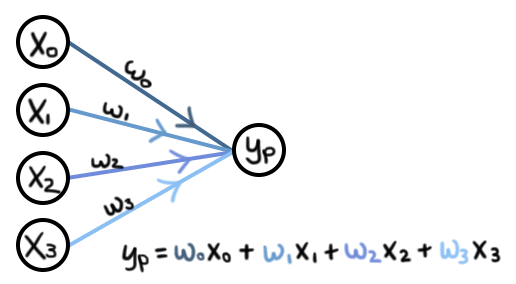

In [272]:
Image(filename='figs/linear_regression_as_neural_network2.png', width=500)
# Image is taken from https://blog.insightdatascience.com/a-quick-introduction-to-vanilla-neural-networks-b0998c6216a1

### Fitting Linear regression to the data 

In [273]:
LR = LinearRegression()
LR.fit(X_train,y_train)
pred_LR = LR.predict(X_test)

In [274]:
print('The R^2 (coefficient of determination) on the test set is:',r2_score(y_test, pred_LR))
print('The MSE on the test set is:',mean_squared_error(y_test, pred_LR))

The R^2 (coefficient of determination) on the test set is: 0.3257016656026597
The MSE on the test set is: 0.5293284051112483


## Random Forest is doing much better compared to Linear Regression. 

# Learning curve 

Might help you understanding if you are over/under fitting the data 

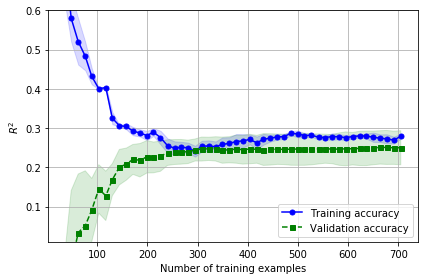

In [277]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


LRLearn =LinearRegression()

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=LRLearn,
                               X=X_train[X_train.columns[0:10]],
                               y=y_train,
                               train_sizes=np.linspace(0.01, 0.2, 50),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('$R^2$')
plt.legend(loc='lower right')
plt.ylim([0.01, 0.6])
plt.tight_layout()

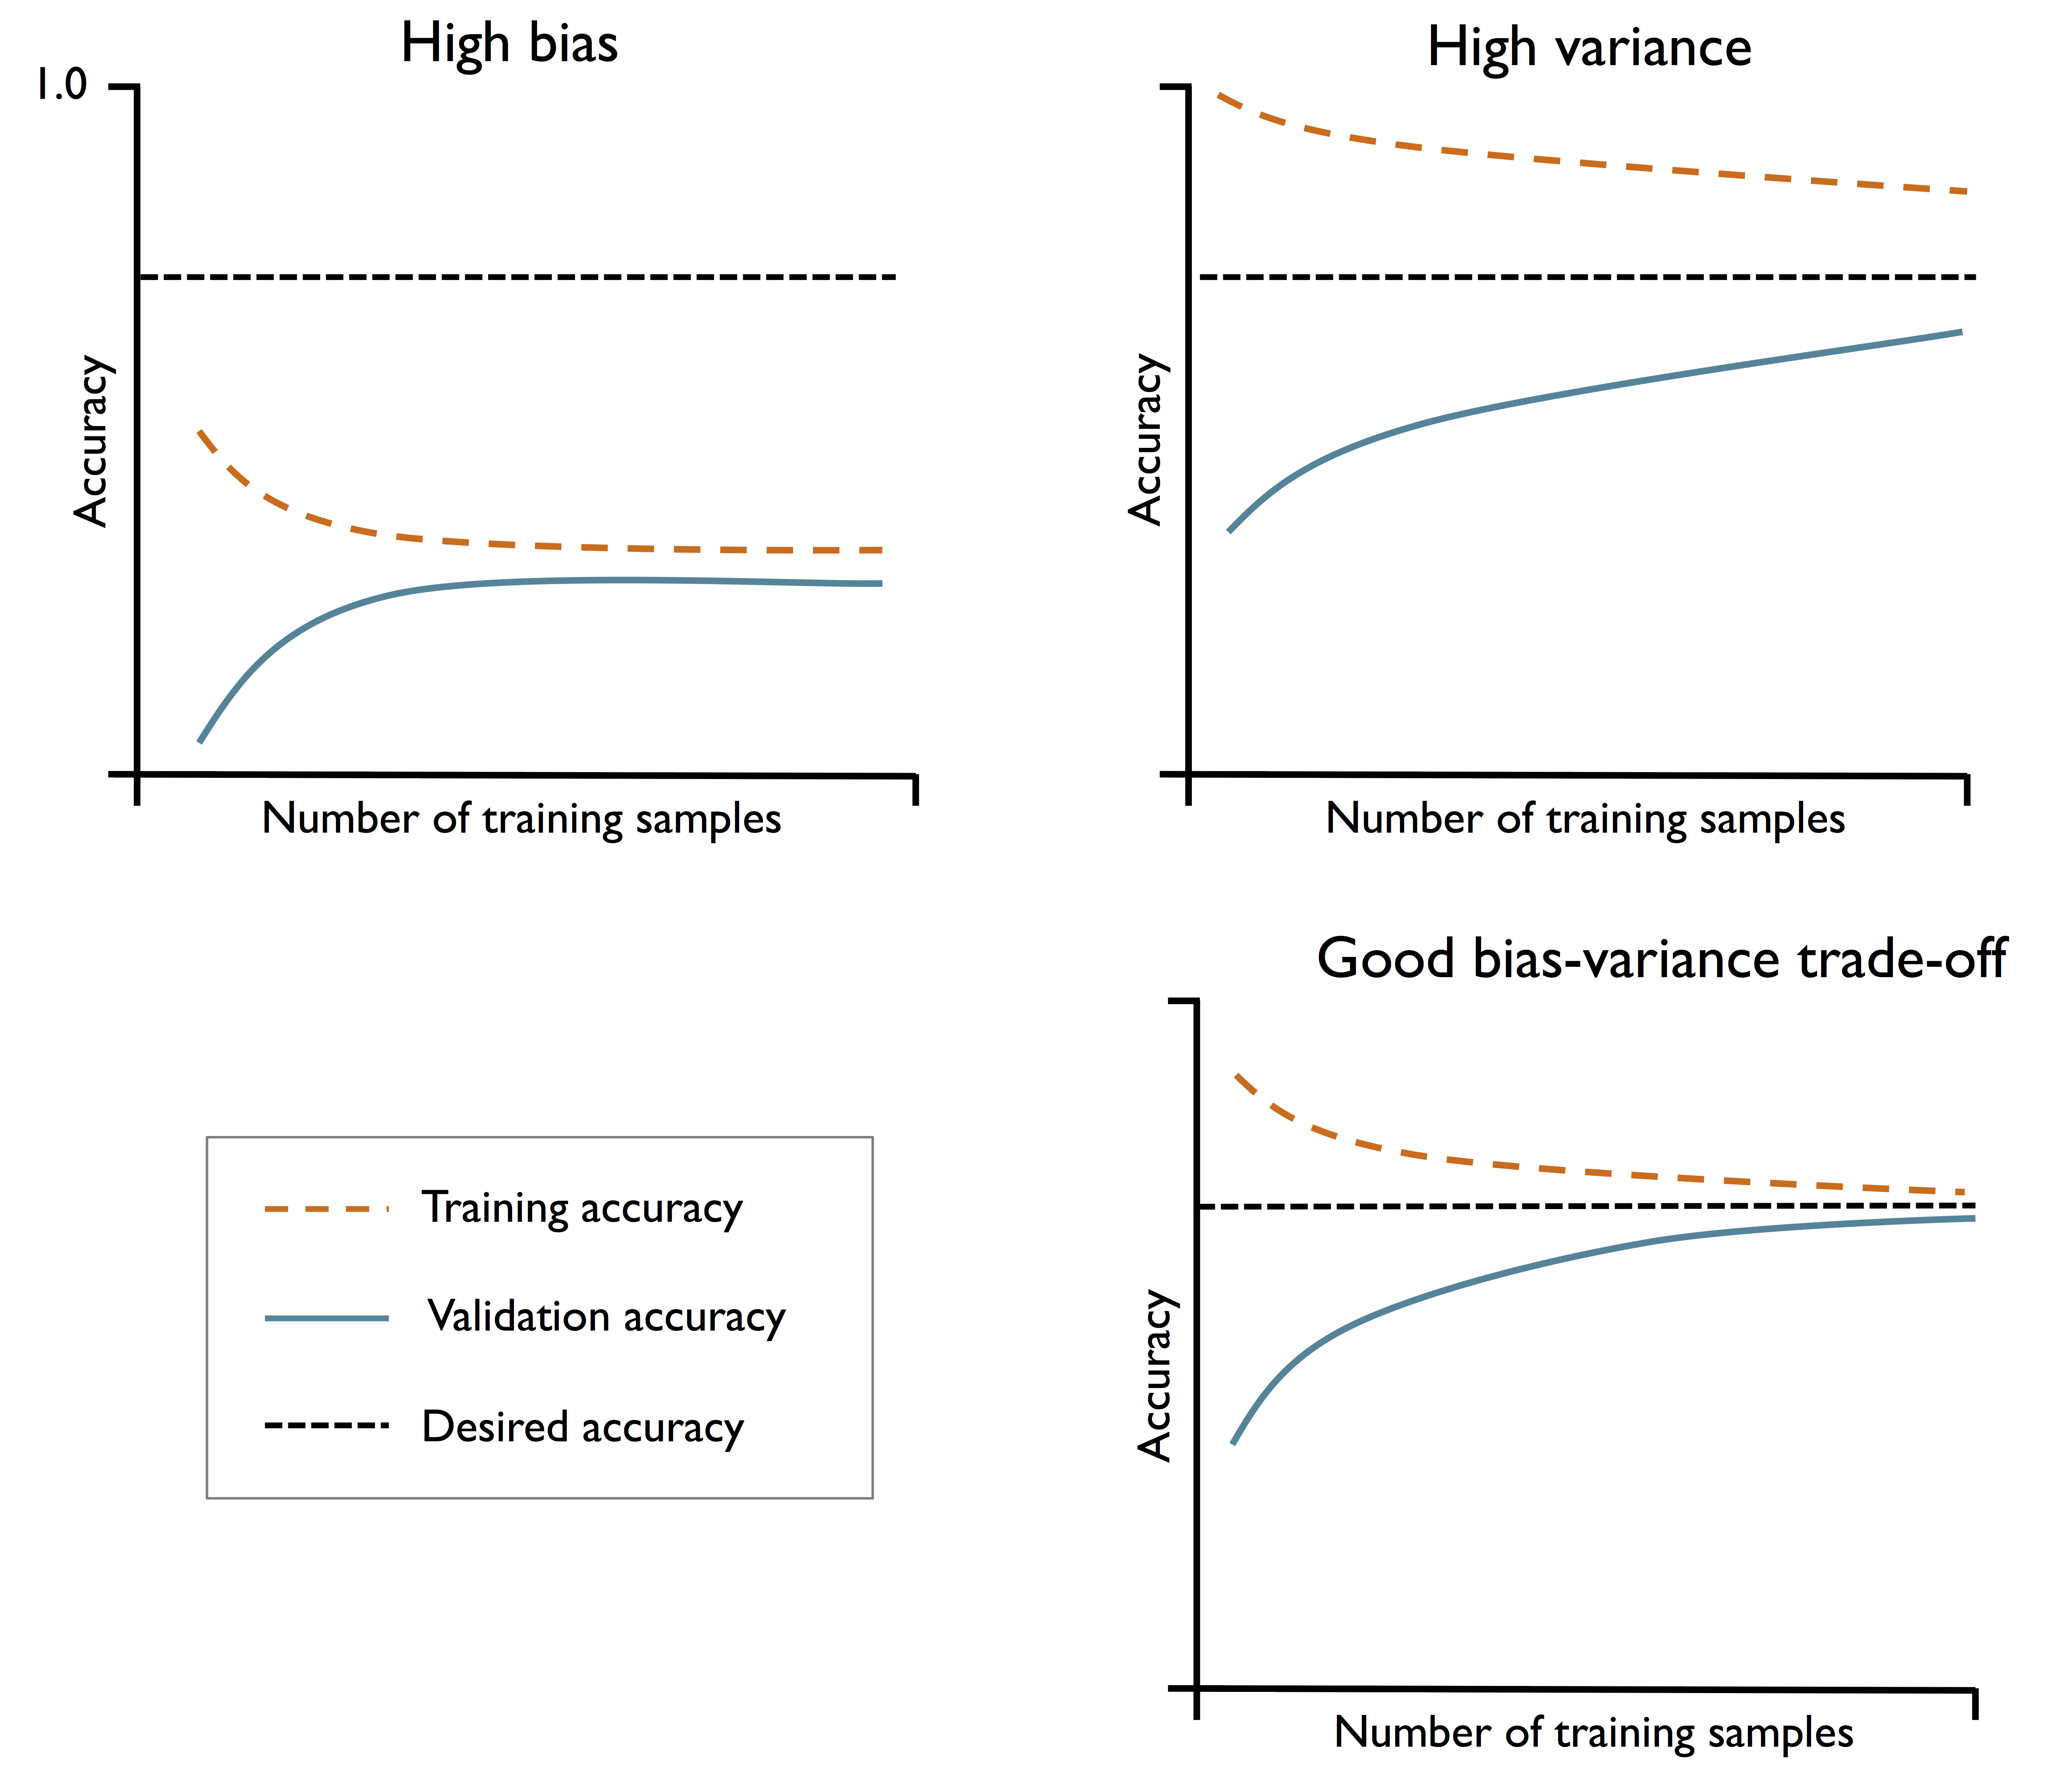

In [231]:
# The figure below is taken from Python Machine Learning book by Sebastian Raschka
Image(filename='figs/Learning_curve.png', width=700)

For random forests these curves might look very different (think why). 

### Random Forest learning curve

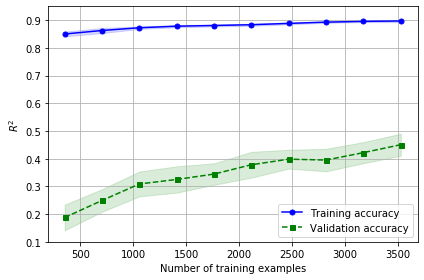

In [281]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


RF11 =RandomForestRegressor(n_estimators= 10)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=RF11,
                               X=X_train[X_train.columns[0:10]],
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('$R^2$')
plt.legend(loc='lower right')
plt.ylim([0.1, 0.95])
plt.tight_layout()

## Boosting

Some of the explanations are taken from [Shirin Glander](https://shirinsplayground.netlify.com/2018/11/ml_basics_gbm/)

### Boosting algorithms seek to improve the prediction power by training a sequence of weak models, each compensating the weaknesses of its predecessors.

## Gradient boosting 

#### The idea is that each model predicts the residual of the previous model. 


Note that boosting maethods are sequential (namely, we have first to develop a learner in order to build the next, unlike random forest where this can be done in parallel)

## XGBoost

XGBoost stands for eXtreme Gradient Boosting ([Reccomended reading](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)).
It is a very popular machine learning algorithms - especially for stractured or tabular data. 


- ### Step 1: Train a decision tree
- ### Step 2: Apply the decision tree just trained to predict
- ### Step 3: Calculate the residual of this decision tree, Save residual errors as the new y
- ### Step 4: Repeat Step 1 (until the number of trees we set to train is reached)
- ### Step 5: Make the final prediction

### The Gradient Boosting makes a new prediction by simply adding up the predictions (of all trees).


See many many posts in the internet (e.g., the explenation above is taken from [here](https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725))


- Structured data vs. unstructured data: structured data is comprised of clearly defined data types whose pattern makes them easily searchable; while unstructured data – “everything else” – is comprised of data that is usually not as easily searchable, including formats like audio, video, and social media postings.

### Fitting XGBoost

In [21]:
XGBreg =xgb.XGBRegressor(max_depth = 5,learning_rate=0.05,
    n_estimators=1000)
eval_set = [(X_test, y_test)]
XGBreg.fit(X_train,y_train,early_stopping_rounds=10, eval_set=eval_set) #Think why how I defined my evaluation set might be a problem 


[14:02:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.18294
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:4.92957
[2]	validation_0-rmse:4.68894
[3]	validation_0-rmse:4.46097
[4]	validation_0-rmse:4.24504
[5]	validation_0-rmse:4.03958
[6]	validation_0-rmse:3.84503
[7]	validation_0-rmse:3.66041
[8]	validation_0-rmse:3.48539
[9]	validation_0-rmse:3.31924
[10]	validation_0-rmse:3.16209
[11]	validation_0-rmse:3.01312
[12]	validation_0-rmse:2.87148
[13]	validation_0-rmse:2.73728
[14]	validation_0-rmse:2.60989
[15]	validation_0-rmse:2.48891
[16]	validation_0-rmse:2.37476
[17]	validation_0-rmse:2.26712
[18]	validation_0-rmse:2.16496
[19]	validation_0-rmse:2.06919
[20]	validation_0-rmse:1.97786
[21]	validation_0-rmse:1.89156
[22]	validation_0-rmse:1.81028
[23]	validation_0-rmse:1.73291
[24]	validation_0-rmse:1.66061
[25]	validation_0-rmse:1.59239
[26]	validation_0-rmse:

/Users/yani/anaconda3/envs/ML_IAP/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[54]	validation_0-rmse:0.741344
[55]	validation_0-rmse:0.733954
[56]	validation_0-rmse:0.726683
[57]	validation_0-rmse:0.720688
[58]	validation_0-rmse:0.714941
[59]	validation_0-rmse:0.709489
[60]	validation_0-rmse:0.704195
[61]	validation_0-rmse:0.6997
[62]	validation_0-rmse:0.695317
[63]	validation_0-rmse:0.691713
[64]	validation_0-rmse:0.688558
[65]	validation_0-rmse:0.68565
[66]	validation_0-rmse:0.683182
[67]	validation_0-rmse:0.68056
[68]	validation_0-rmse:0.677882
[69]	validation_0-rmse:0.675369
[70]	validation_0-rmse:0.673268
[71]	validation_0-rmse:0.671739
[72]	validation_0-rmse:0.670132
[73]	validation_0-rmse:0.66868
[74]	validation_0-rmse:0.666981
[75]	validation_0-rmse:0.665747
[76]	validation_0-rmse:0.664829
[77]	validation_0-rmse:0.663753
[78]	validation_0-rmse:0.662826
[79]	validation_0-rmse:0.662169
[80]	validation_0-rmse:0.661398
[81]	validation_0-rmse:0.660655
[82]	validation_0-rmse:0.660076
[83]	validation_0-rmse:0.65933
[84]	validation_0-rmse:0.658731
[85]	validatio

[305]	validation_0-rmse:0.625359
[306]	validation_0-rmse:0.625413
[307]	validation_0-rmse:0.62535
[308]	validation_0-rmse:0.625295
[309]	validation_0-rmse:0.625298
[310]	validation_0-rmse:0.625126
[311]	validation_0-rmse:0.625145
[312]	validation_0-rmse:0.624909
[313]	validation_0-rmse:0.624801
[314]	validation_0-rmse:0.62479
[315]	validation_0-rmse:0.624707
[316]	validation_0-rmse:0.624357
[317]	validation_0-rmse:0.624233
[318]	validation_0-rmse:0.624187
[319]	validation_0-rmse:0.624165
[320]	validation_0-rmse:0.624332
[321]	validation_0-rmse:0.623958
[322]	validation_0-rmse:0.623985
[323]	validation_0-rmse:0.623715
[324]	validation_0-rmse:0.623603
[325]	validation_0-rmse:0.623646
[326]	validation_0-rmse:0.623666
[327]	validation_0-rmse:0.62367
[328]	validation_0-rmse:0.623816
[329]	validation_0-rmse:0.623726
[330]	validation_0-rmse:0.623532
[331]	validation_0-rmse:0.623468
[332]	validation_0-rmse:0.623262
[333]	validation_0-rmse:0.623231
[334]	validation_0-rmse:0.623151
[335]	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [22]:
pred = XGBreg.predict(X_test)
print('The R^2 (coefficient of determination) on the test set is:',r2_score(y_test, pred))
# print('The MSE (coefficient of determination) on the test set is:', mean_squared_error(y_test, pred))
pred_train = XGBreg.predict(X_train)
print('The R^2 (coefficient of determination) on the train set is:',r2_score(y_train, pred_train))


The R^2 (coefficient of determination) on the test set is: 0.5222832797123
The R^2 (coefficient of determination) on the train set is: 0.8110235236513691


## Few examples of important parameters in XGBoost 
- n_estimators, Early stopping
- Learning rate
- max_depth
- regularization parameters (e.g., reg_alpha, reg_lambda, gamma) 